In [1]:
from dqn.agent import CarRacingDQN
import os
import tensorflow as tf
import gym
import _thread
import re
import sys

import h5py

from matplotlib import pyplot as plt

import numpy as np

#from car_racing import CarRacingFixed
from car_racing_square import CarRacingSquare

model_config = dict(
    min_epsilon=0.1,
    max_negative_rewards=12,
    min_experience_size=int(1e4),
    num_frame_stack=1,
    frame_skip=3,
    train_freq=4,
    batchsize=64,
    epsilon_decay_steps=int(1e5),
    network_update_freq=int(1e3),
    experience_capacity=int(4e4),
    gamma=0.95
)

#env_name = "CarRacing-v0"
#env = gym.make(env_name)

#env = CarRacingFixed()
env = CarRacingSquare()
#obs = env.reset()
#obs = env.reset()

# tf.reset_default_graph()
dqn_agent = CarRacingDQN(env=env, **model_config)
dqn_agent.build_graph()
sess = tf.InteractiveSession()
dqn_agent.session = sess

saver = tf.train.Saver(max_to_keep=100)

checkpoint_path = "data/square"

print("loading the latest checkpoint from %s" % checkpoint_path)
ckpt = tf.train.get_checkpoint_state(checkpoint_path)
assert ckpt, "checkpoint path %s not found" % checkpoint_path
global_counter = int(re.findall("-(\d+)$", ckpt.model_checkpoint_path)[0])
saver.restore(sess, ckpt.model_checkpoint_path)
#dqn_agent.global_counter = global_counter

dqn_agent.do_training = False
dqn_agent.do_rollouts = True

save_freq_episodes = 5

print(dqn_agent.get_epsilon())
print(dqn_agent.global_counter)

save_path = 'data/square/hard_trees_frames_48664_train_points/'
test_episodes = 1
min_depth = 8
max_depth = 20
max_neg_rewards=12

/home/dahlin/Desktop/Car Racing/car_racing_retry/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dahlin/Desktop/Car Racing/car_racing_retry/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dahlin/Desktop/Car Racing/car_racing_retry/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/hom

In [2]:
from matplotlib import pyplot as plt

import numpy as np

import pickle

from sklearn.tree import DecisionTreeClassifier
from CarRacingHDT import CarRacingHDT

import gym

from skimage import color, transform
import itertools as it

import h5py

#from car_racing import CarRacingFixed

def process_image(obs):
    return 2 * color.rgb2gray(obs) - 1.0


all_actions = np.array(
            [k for k in it.product([-1, 0, 1], [1, 0], [0.2, 0])]
        )
action_map=all_actions

def check_early_stop(reward, totalreward):
    if reward < 0:
        neg_reward_counter += 1

def check_early_stop(reward, totalreward):
    if reward < 0:
        neg_reward_counter += 1
        done = (self.neg_reward_counter > self.max_neg_rewards)

        if done and totalreward <= 500:
            punishment = -20.0
        else:
            punishment = 0.0  
        if done:
            self.neg_reward_counter = 0

        return done, punishment
    else:
        self.neg_reward_counter = 0
        return False, 0.0

Track generation: 1051..1318 -> 267-tiles track
Track generation: 1051..1318 -> 267-tiles track


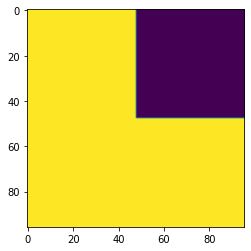

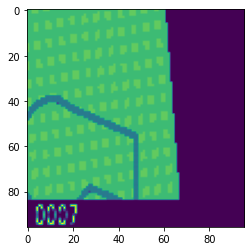

In [3]:
test_episodes = 2
dqn_rewards = []
dqn_actions = []
for i in range(test_episodes):
    reward, frames_in_episode, actions, frames = dqn_agent.play_episode()
    dqn_rewards.append(reward)
    dqn_actions.append(actions)

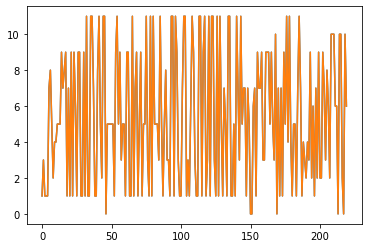

In [9]:
for acts in dqn_actions:
    plt.plot(acts)

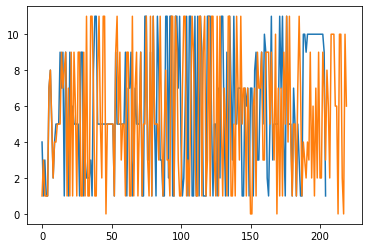

In [7]:
for acts in dqn_actions:
    plt.plot(acts)

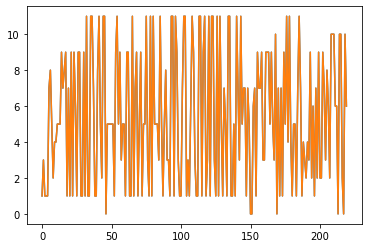

In [28]:
plt.plot(np.array(dqn_actions).T)

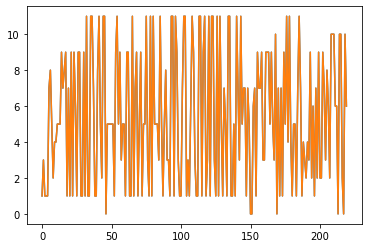

In [26]:
plt.plot(np.array(dqn_actions).T)

In [14]:
f = h5py.File(save_path+'dqn_rewards_'+str(test_episodes)+'.h5','w')
f.create_dataset('ep_rewards',data=dqn_rewards)
f.close()

In [30]:
test_episodes

2

Depth: 8
Episode: 1
Track generation: 1779..2220 -> 441-tiles track
frames in episode: 62
total reward: -20.41818181818182
Depth: 9
Episode: 1
Track generation: 1779..2220 -> 441-tiles track
frames in episode: 49
total reward: 6.209090909090811
Depth: 10
Episode: 1
Track generation: 1779..2220 -> 441-tiles track
frames in episode: 33
total reward: -7.172727272727249
Depth: 11
Episode: 1
Track generation: 1779..2220 -> 441-tiles track
frames in episode: 55
total reward: 31.681818181818066
Depth: 12
Episode: 1
Track generation: 1779..2220 -> 441-tiles track
frames in episode: 51
total reward: 21.518181818181716
Depth: 13
Episode: 1
Track generation: 1779..2220 -> 441-tiles track
frames in episode: 45
total reward: 9.681818181818102
Depth: 14
Episode: 1
Track generation: 1779..2220 -> 441-tiles track
frames in episode: 52
total reward: 23.490909090908985
Depth: 15
Episode: 1
Track generation: 1779..2220 -> 441-tiles track
frames in episode: 75
total reward: 41.590909090909
Depth: 16
Episo

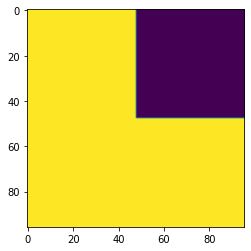

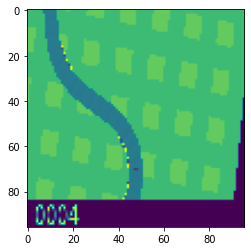

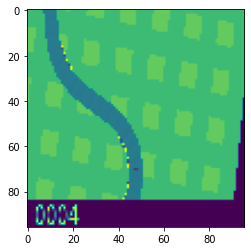

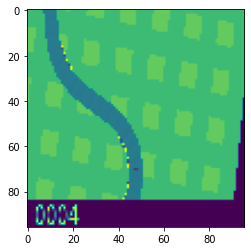

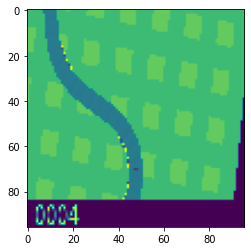

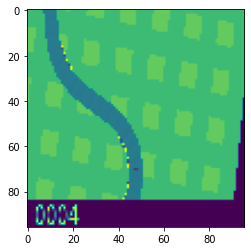

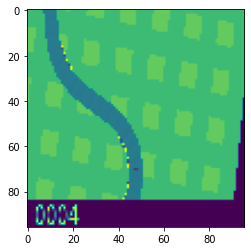

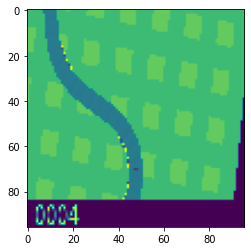

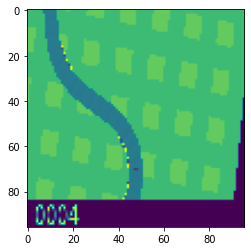

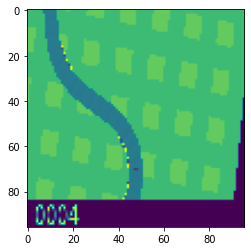

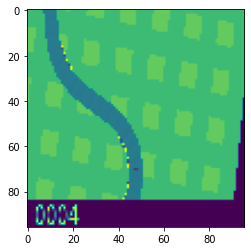

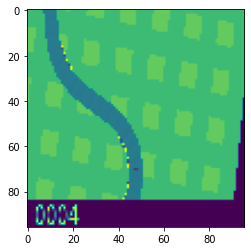

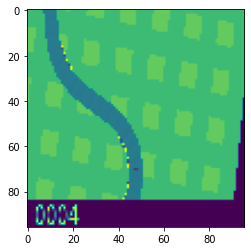

In [3]:

for depth in range(min_depth,max_depth+1):
#for depth in range(min_depth,min_depth+1):

    #depth = 12
    student = pickle.load(open(save_path+'hard_tree_depth_'+str(depth)+'_balanced.pkl','rb'))

    student = CarRacingHDT(student,max_negative_rewards=max_neg_rewards)

    #env_name = "CarRacing-v0"
    #env = gym.make(env_name)

    frame_skip = 3
    render = 1

    ep_rewards = []
    ep_actions = []
    episode_counter = 0

    for ep in range(0,test_episodes):

        print('Depth: '+str(depth))
        print('Episode: '+str(episode_counter+1))
        episode_counter+=1
        total_reward = 0
        frames_in_episode = 0
        obs = env.reset()
        plt.figure()
        plt.imshow(process_image(obs))

        acts = []

        while True:
            obs_pp = process_image(obs)
            #obs_pp = obs_pp.reshape((1,-1))
            obs_pp = obs_pp.reshape((1,-1))
        #action_idx = student.predict(obs_pp).argmax(axis=1)[0]
            action_idx = student.tree.predict(obs_pp)[0]
            action = action_map[action_idx]
            acts.append(action_idx)
            #print(action_idx)
            #print(action)

            reward = 0
            for _ in range(frame_skip):
                obs, r, done, info = env.step(action)
                if render:
                    env.render()
                reward += r
                if done:
                    break
            
            early_done, punishment = student.check_early_stop(reward, total_reward)
            if early_done:
                reward += punishment

            done = done or early_done

            total_reward += reward
            frames_in_episode += 1

            if done:
                print('frames in episode: '+str(frames_in_episode))
                print('total reward: '+str(total_reward))
                break

        ep_rewards.append(total_reward)
        ep_actions.append(acts)

    f = h5py.File(save_path+'hard_tree_depth_'+str(depth)+'balanced_rewards_'+str(test_episodes)+'.h5','w')
    f.create_dataset('ep_rewards',data=ep_rewards)
    #f.create_dataset('ep_actions',data=ep_actions)
    f.close()

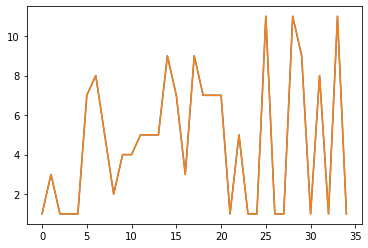

In [14]:
plt.figure()
for acts in ep_actions:
    plt.plot(acts)

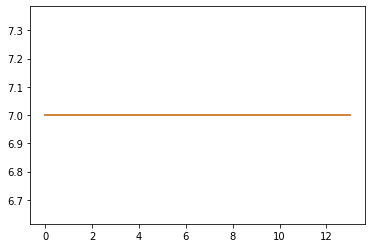

In [33]:
plt.plot(np.array(ep_actions).T)

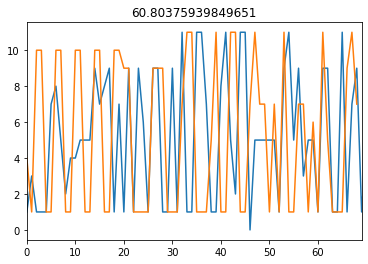

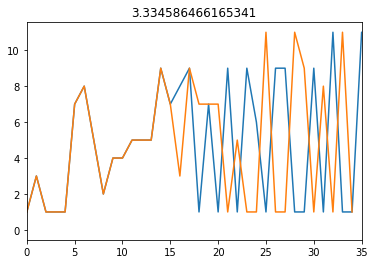

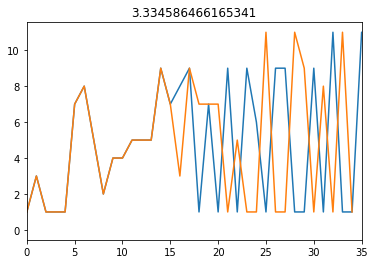

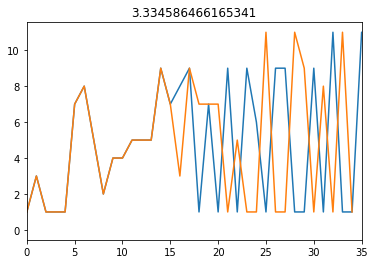

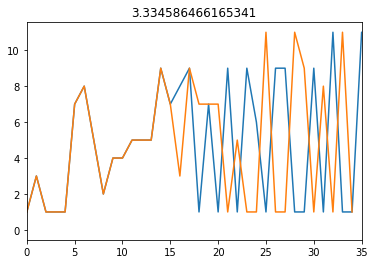

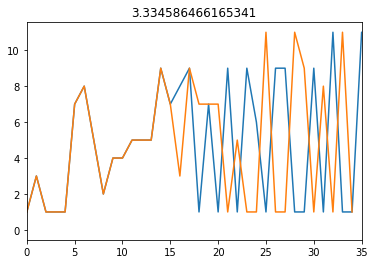

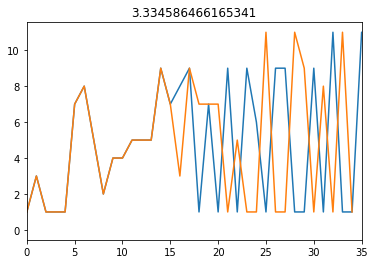

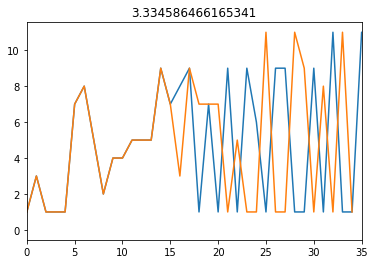

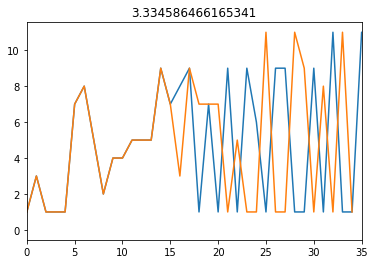

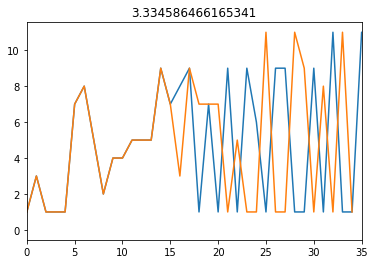

In [22]:
for i,acts in enumerate(ep_actions):
    plt.figure()
    plt.plot(dqn_actions[-1])
    plt.plot(acts)
    plt.xlim([0,len(acts)])
    plt.title(str(ep_rewards[i]))

In [3]:
import scipy
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [4]:
confidence = 0.95

dqn_mean,dqn_lb,dqn_ub = mean_confidence_interval(dqn_rewards,confidence=confidence)
dqn_err = np.zeros((2,1))
dqn_err[0] = dqn_mean-dqn_lb
dqn_err[1] = dqn_ub-dqn_mean

NameError: name 'dqn_rewards' is not defined

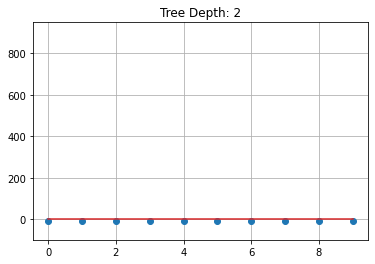

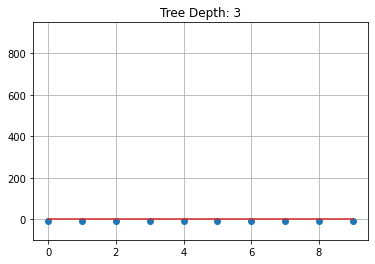

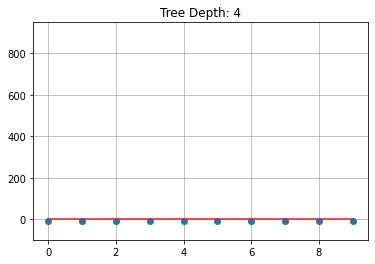

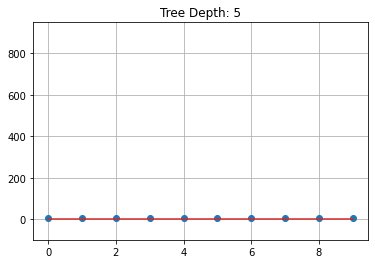

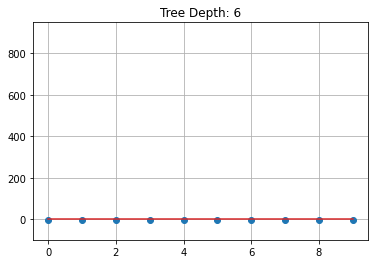

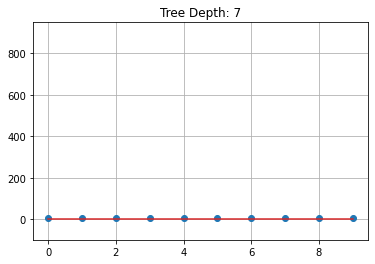

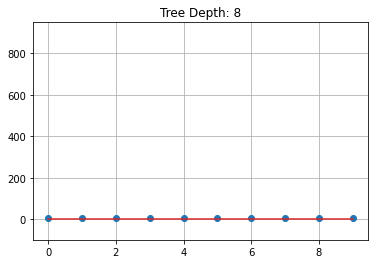

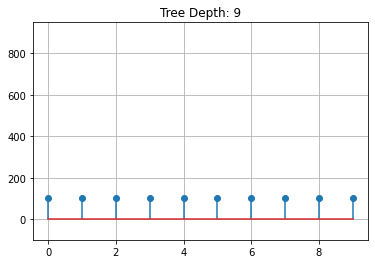

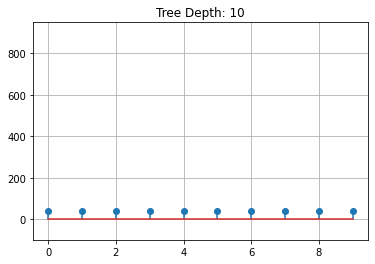

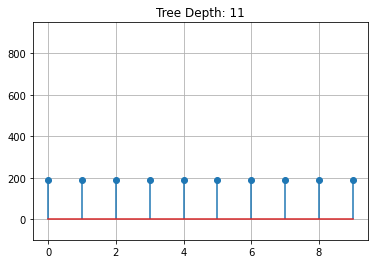

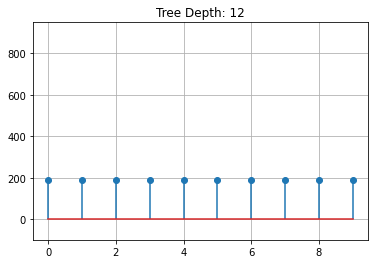

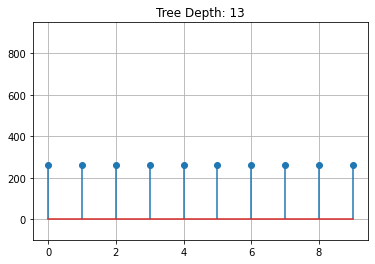

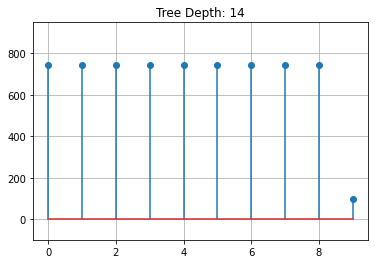

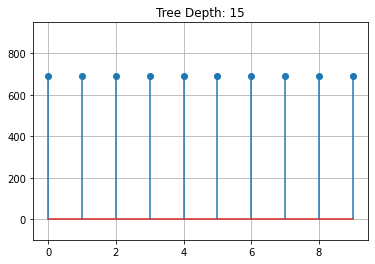

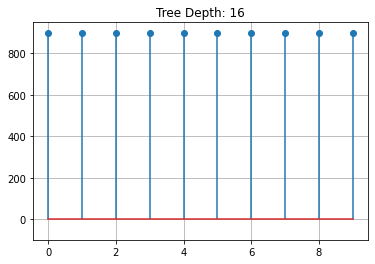

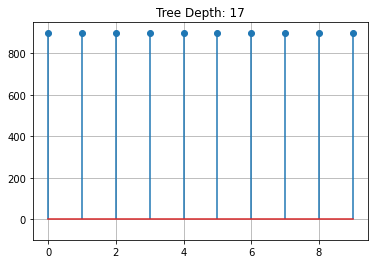

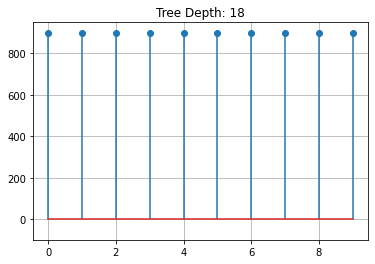

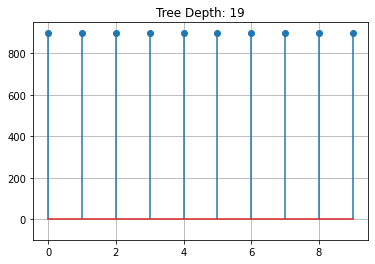

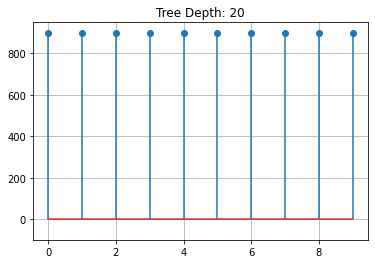

In [8]:
means = []
lbs = []
ubs = []

for depth in range(min_depth,max_depth+1):
    f = h5py.File(save_path+'hard_tree_depth_'+str(depth)+'_rewards.h5','r')
    ep_rewards = f['ep_rewards'][:]
    mean,lb,ub = mean_confidence_interval(ep_rewards,confidence=confidence)
    means.append(mean)
    lbs.append(lb)
    ubs.append(ub)
    f.close()
    plt.figure()
    plt.stem(ep_rewards)
    plt.title('Tree Depth: '+str(depth))
    plt.ylim((-100,950))
    plt.grid()

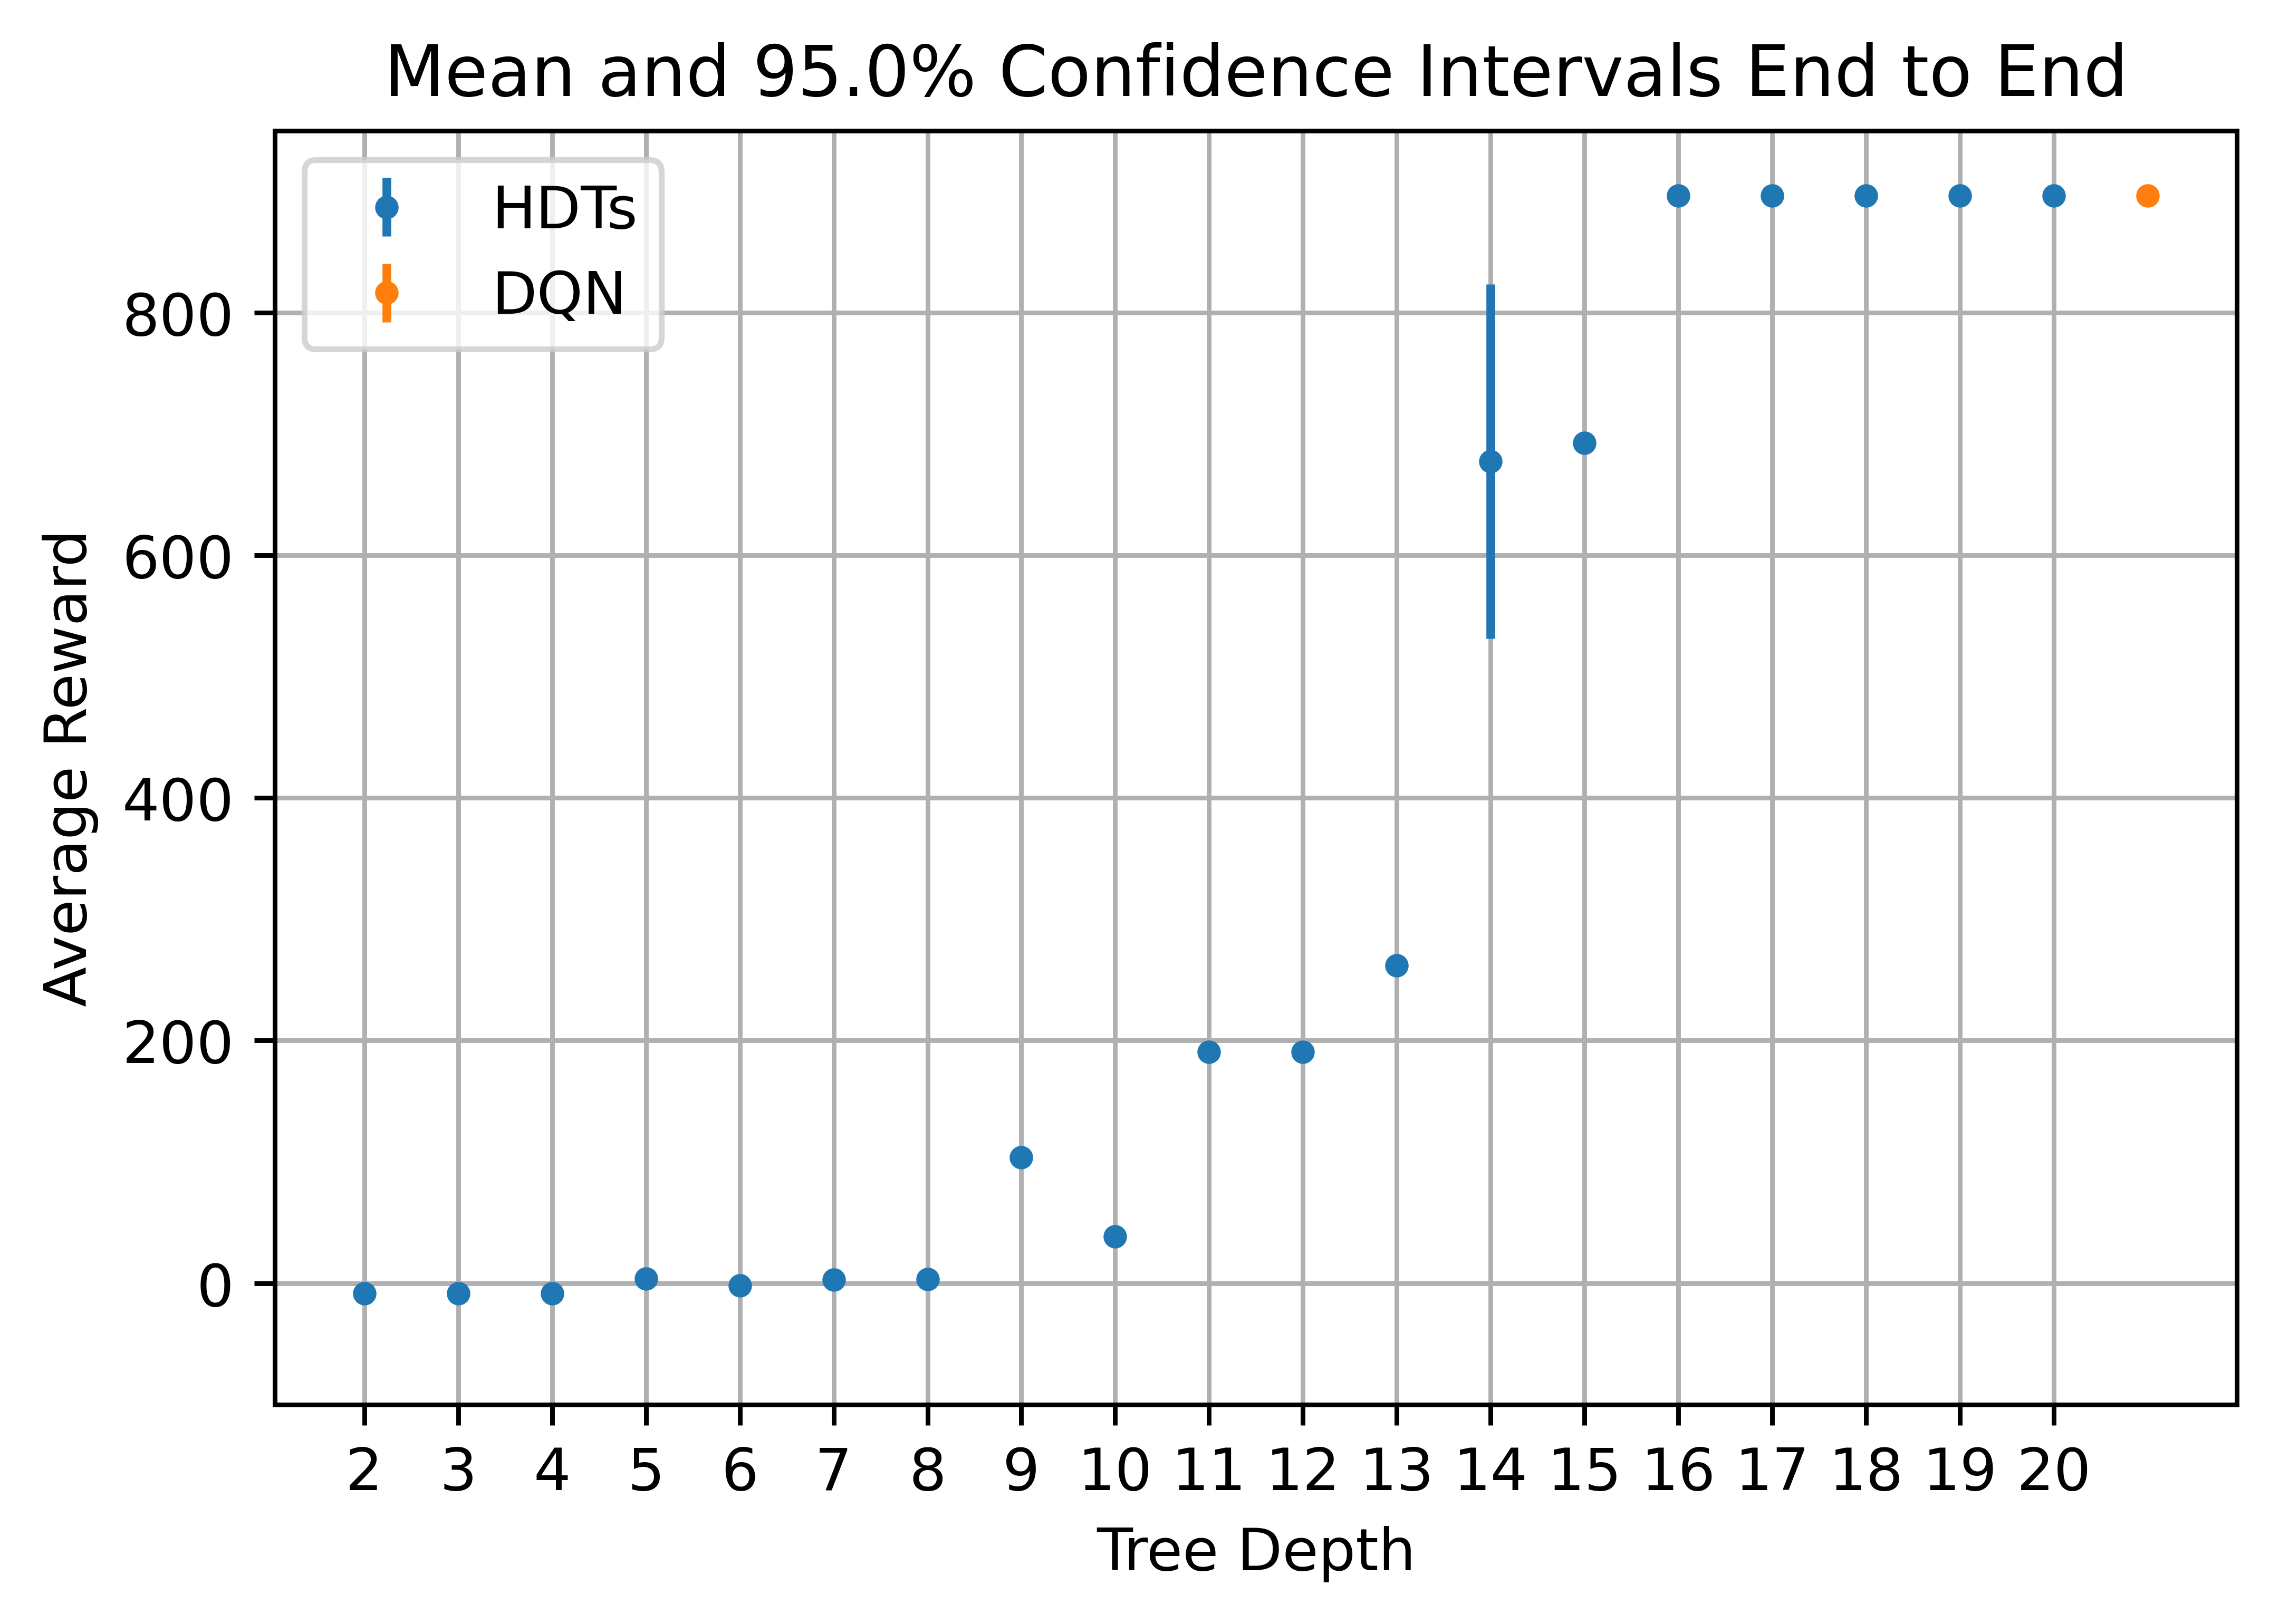

In [19]:
x = np.asarray(range(min_depth,max_depth+1))

err = np.zeros((2,len(x)))
err[0] = means-np.asarray(lbs)
err[1] = np.asarray(ubs)-means

fig = plt.figure(dpi=800)
#plt.errorbar(x,hdt_means,hdt_err,uplims=True,lolims=True,label='HDTs',fmt='o')
plt.errorbar(x,means,err,label='HDTs',fmt='.')
plt.errorbar(np.max(x)+1,dqn_mean,dqn_err,label='DQN',fmt='.')
#plt.errorbar(np.max(depth_list)+1,dqn_mean,dqn_err,label='DQN',fmt='.')
plt.grid()
plt.legend()
plt.xlabel('Tree Depth')
plt.ylabel('Average Reward')
plt.ylim((-100,950))
plt.xticks(x)
plt.title('Mean and '+str(confidence*100)+'% Confidence Intervals End to End');
plt.savefig('EndtoEnd_Performance_'+str(test_episodes)+'_episodes')
#plt.savefig('Car Racing Mean and '+str(confidence*100)+' Confidence Intervals.png')